In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from multiprocessing import Pool
import matplotlib.pyplot as plt

from functools import partial

import param_scan


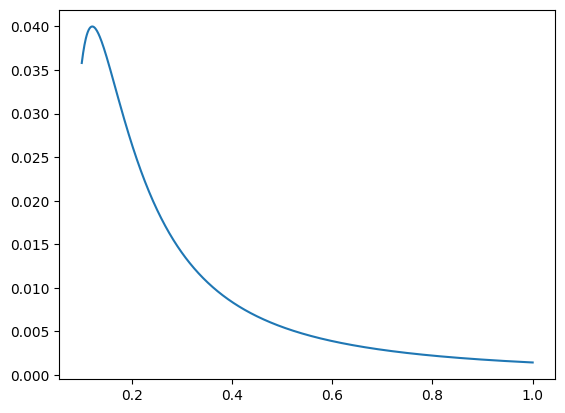

In [3]:
# Test the probabilities
theta = {"g": 1, "m4": np.sqrt(0.3), "Ue4Sq": 1e-1, "Um4Sq": 1e-1}
sterile = param_scan.Sterile(theta, decouple_decay=False, oscillations=True, decay=False)
# sterile.Ldec(0.2)
# sterile.Losc(0.3)
E = np.linspace(0.1, 1, 1000)
L = 0.5
plt.plot(E, sterile.Pme(E,E,L))

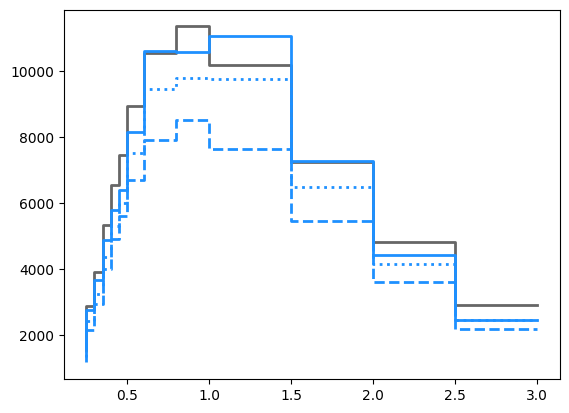

In [4]:
# NuE spectra as a function of true energy, w/o and w/ new physics.
MuB_True_BinEdges = [
    0.200,
    0.250,
    0.300,
    0.350,
    0.400,
    0.450,
    0.500,
    0.600,
    0.800,
    1.000,
    1.500,
    2.000,
    2.500,
    3.000,
]
MCT = [77.71578947, 143.90340557, 196.07832817, 267.13560372, 327.16160991,
  373.37368421, 894.8247678, 2112.43839009, 2272.64024768, 5099.22910217,
3630.38080495, 2404.02167183, 1456.92260062]
#theta = {"g": 1, "m4": 100, "Ue4Sq": 1e-1, "Um4Sq": 5e-1}
theta = {"g": 1, "m4": 100, "Ue4Sq": 5e-1, "Um4Sq": 0.0}
sterile = param_scan.Sterile(theta, decouple_decay=False, oscillations=True, decay=True)
# sterile.Ldec(0.2)
# sterile.Losc(0.3)
Ebin = np.linspace(0, 3, 51)
L = 0.5
PeeRW = []
PeeRWn1 = []

PeeRW_deg = np.zeros((len(MCT), len(MCT)))
PeeRW_degn1 = np.zeros((len(MCT), len(MCT)))
PeeRW_osc = []
# degradation piece
for k in range(len(MCT)):
    for i in range(k + 1):
        Peedecay = sterile.Peedecay(MuB_True_BinEdges[k], MuB_True_BinEdges[k + 1], MuB_True_BinEdges[i], MuB_True_BinEdges[i + 1], L, noffset=0)
        PeeRW_deg[k][i] = Peedecay * MCT[i] / (MuB_True_BinEdges[i + 1] - MuB_True_BinEdges[i])

        Peedecayn1 = sterile.Peedecay(MuB_True_BinEdges[k], MuB_True_BinEdges[k + 1], MuB_True_BinEdges[i], MuB_True_BinEdges[i + 1], L, noffset=10000)
        PeeRW_degn1[k][i] = Peedecayn1 * MCT[i] / (MuB_True_BinEdges[i + 1] - MuB_True_BinEdges[i])
PeeRW_sum = np.sum(PeeRW_deg, axis=0)
PeeRW_sumn1 = np.sum(PeeRW_degn1, axis=0)

# oscillation piece
for i in range(len(MCT)):
    Peeosc = sterile.Peeosc(MuB_True_BinEdges[i], MuB_True_BinEdges[i + 1], L)
    PeeRW_osc.append(Peeosc * MCT[i] / (MuB_True_BinEdges[i + 1] - MuB_True_BinEdges[i]))

# Normalize MCT-event rate/GeV
MCT_norm = []
for i in range(len(MCT)):
    MCT_norm.append(MCT[i] / (MuB_True_BinEdges[i + 1] - MuB_True_BinEdges[i]))
PeeRW = PeeRW_sum + PeeRW_osc
PeeRWn1 = PeeRW_sumn1 + PeeRW_osc



#PeeRW_unnorm = sterile.EnergyDegradation(MCT, MuB_True_BinEdges, 'Pee')
plt.step(MuB_True_BinEdges[1:], MCT_norm, color='#666666', ls='-', lw=2)
plt.step(MuB_True_BinEdges[1:], PeeRW, color='dodgerblue', ls='-', lw=2)
plt.step(MuB_True_BinEdges[1:], PeeRWn1, color='dodgerblue', ls=':', lw=2)
plt.step(MuB_True_BinEdges[1:], PeeRW_osc, color='dodgerblue', ls='--', lw=2)
#plt.step(MuB_True_BinEdges[1:], PeeRW_unnorm)
#plt.step(MuB_True_BinEdges[1:], PeeRW_sum1, label = 'n = 1 (default)')
#plt.step(MuB_True_BinEdges[1:], PeeRW_sum2, label = 'n = 2')
#plt.step(MuB_True_BinEdges[1:], PeeRW_sum3, label = 'n = 3')
#plt.xlabel('True energy(GeV)')
#plt.ylabel('Events/GeV')
#plt.title('NuE spectrum (decay term) with different degradation power(n)')
#plt.legend()

#plt.step(MuB_True_BinEdges[1:], PeeRW_osc)
#plt.step(MuB_True_BinEdges[1:], PeeRW_deg[5])
#plt.step(MuB_True_BinEdges[1:], PeeRW_deg[7])
#plt.step(MuB_True_BinEdges[1:], PeeRW_deg[9])

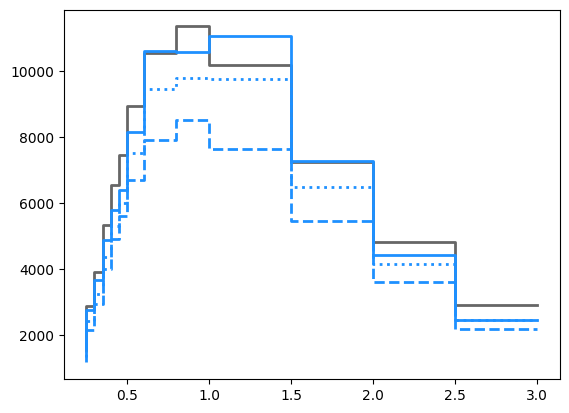

In [5]:
# NuE spectra as a function of true energy, w/o and w/ new physics.
MuB_True_BinEdges = [
    0.200,
    0.250,
    0.300,
    0.350,
    0.400,
    0.450,
    0.500,
    0.600,
    0.800,
    1.000,
    1.500,
    2.000,
    2.500,
    3.000,
]
MCT = [77.71578947, 143.90340557, 196.07832817, 267.13560372, 327.16160991,
  373.37368421, 894.8247678, 2112.43839009, 2272.64024768, 5099.22910217,
3630.38080495, 2404.02167183, 1456.92260062]
#theta = {"g": 1, "m4": 100, "Ue4Sq": 1e-1, "Um4Sq": 5e-1}
theta = {"g": 1, "m4": 100, "Ue4Sq": 5e-1, "Um4Sq": 0.0}
sterile = param_scan.Sterile(theta, decouple_decay=False, oscillations=True, decay=True)
# sterile.Ldec(0.2)
# sterile.Losc(0.3)
Ebin = np.linspace(0, 3, 51)
L = 0.5
PeeRW = []
PeeRWn1 = []

PeeRW_deg = np.zeros((len(MCT), len(MCT)))
PeeRW_degn1 = np.zeros((len(MCT), len(MCT)))
PeeRW_osc = []
# degradation piece
for k in range(len(MCT)):
    for i in range(k + 1):
        Peedecay = sterile.Peedecay(MuB_True_BinEdges[k], MuB_True_BinEdges[k + 1], MuB_True_BinEdges[i], MuB_True_BinEdges[i + 1], L, noffset=0)
        PeeRW_deg[k][i] = Peedecay * MCT[i] / (MuB_True_BinEdges[i + 1] - MuB_True_BinEdges[i])

        Peedecayn1 = sterile.Peedecay(MuB_True_BinEdges[k], MuB_True_BinEdges[k + 1], MuB_True_BinEdges[i], MuB_True_BinEdges[i + 1], L, noffset=10000)
        PeeRW_degn1[k][i] = Peedecayn1 * MCT[i] / (MuB_True_BinEdges[i + 1] - MuB_True_BinEdges[i])
PeeRW_sum = np.sum(PeeRW_deg, axis=0)
PeeRW_sumn1 = np.sum(PeeRW_degn1, axis=0)

# oscillation piece
for i in range(len(MCT)):
    Peeosc = sterile.Peeosc(MuB_True_BinEdges[i], MuB_True_BinEdges[i + 1], L)
    PeeRW_osc.append(Peeosc * MCT[i] / (MuB_True_BinEdges[i + 1] - MuB_True_BinEdges[i]))

# Normalize MCT-event rate/GeV
MCT_norm = []
for i in range(len(MCT)):
    MCT_norm.append(MCT[i] / (MuB_True_BinEdges[i + 1] - MuB_True_BinEdges[i]))
PeeRW = PeeRW_sum + PeeRW_osc
PeeRWn1 = PeeRW_sumn1 + PeeRW_osc



#PeeRW_unnorm = sterile.EnergyDegradation(MCT, MuB_True_BinEdges, 'Pee')
plt.step(MuB_True_BinEdges[1:], MCT_norm, color='#666666', ls='-', lw=2)
plt.step(MuB_True_BinEdges[1:], PeeRW, color='dodgerblue', ls='-', lw=2)
plt.step(MuB_True_BinEdges[1:], PeeRWn1, color='dodgerblue', ls=':', lw=2)
plt.step(MuB_True_BinEdges[1:], PeeRW_osc, color='dodgerblue', ls='--', lw=2)
#plt.step(MuB_True_BinEdges[1:], PeeRW_unnorm)
#plt.step(MuB_True_BinEdges[1:], PeeRW_sum1, label = 'n = 1 (default)')
#plt.step(MuB_True_BinEdges[1:], PeeRW_sum2, label = 'n = 2')
#plt.step(MuB_True_BinEdges[1:], PeeRW_sum3, label = 'n = 3')
#plt.xlabel('True energy(GeV)')
#plt.ylabel('Events/GeV')
#plt.title('NuE spectrum (decay term) with different degradation power(n)')
#plt.legend()
#plt.gca().axis([0.5, 1.5, 8000, 12000])
#plt.step(MuB_True_BinEdges[1:], PeeRW_osc)
#plt.step(MuB_True_BinEdges[1:], PeeRW_deg[5])
#plt.step(MuB_True_BinEdges[1:], PeeRW_deg[7])
#plt.step(MuB_True_BinEdges[1:], PeeRW_deg[9])

In [6]:
pedro_mbosc_table = np.loadtxt("/Users/kjkelly/Dropbox/GitHub/muB_oscillation/MicroTools/MB_data/MB_osc_tables/dm-MB-events-table-TrueEnu.dat")

[0.003625   0.005875   0.008125   ... 0.01937505 0.02162505 0.02387505]


(array([3.99987513e+01, 8.12080020e+02, 2.19228077e+03, 3.82956845e+03,
        4.80960681e+03, 5.42455589e+03, 5.83194265e+03, 4.59050685e+03,
        2.64046996e+03, 8.87721559e+02, 1.16033248e+02, 8.58357759e+00,
        8.59613907e-01]),
 array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.6 , 0.8 , 1.  , 1.5 ,
        2.  , 2.5 , 3.  ]),
 [<matplotlib.patches.Polygon at 0x2d0b684c0>])

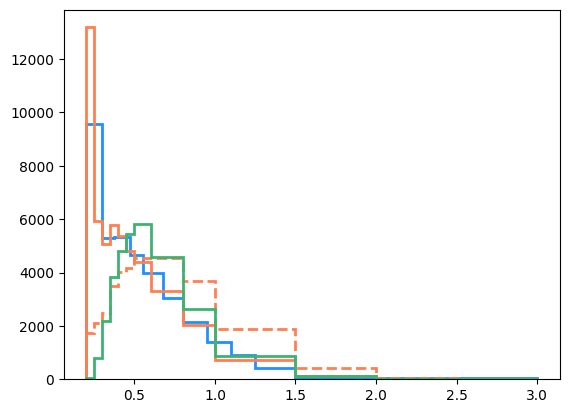

In [7]:
MiniBooNE_Signal = np.genfromtxt('/Users/kjkelly/Dropbox/GitHub/muB_oscillation/MiniTools/include/MB_data_release/fhcmode/miniboone_numunuefullosc_ntuple.txt')
LMBT = 0.4685  # Baseline length in kilometers
NREPLICATION = 10
Ereco = MiniBooNE_Signal[:, 0] / 1000  # GeV
Etrue = MiniBooNE_Signal[:, 1] / 1000  # GeV
Weight = MiniBooNE_Signal[:, 3] / len(MiniBooNE_Signal[:, 3])
e_prod_e_int_bins = np.linspace(0, 3, 51)  # GeV
Length = MiniBooNE_Signal[:, 2] / 100000  # Kilometers
theta = {"g": 1, "m4": 100, "Ue4Sq": 5e-2, "Um4Sq": 0.05}
sterile = param_scan.Sterile(theta, decouple_decay=False, oscillations=True, decay=True)
nue_bin_edges = np.array([200.0, 300.0, 375.0, 475.0, 550.0, 675.0, 800.0, 950.0, 1100.0, 1250.0, 1500.0, 3000.0])
nue_reco_dist = [527.164624, 315.423689, 349.644825, 186.211970, 261.441799, 195.534193, 203.008745, 165.664396, 118.581365, 143.989367, 201.450357]  
numu_bin_edges = np.array([0, 0.5, 0.7, 0.9, 1.1, 1.3, 1.50, 1.7, 1.9]) * 1e3  # MeV
numu_reco_dist = [56314.570151, 86652.16900, 77496.377767, 54280.574682, 33589.592857, 18141.591625, 8780.439580, 4090.676535]

def create_e_daughter(e_prod, n_replications=NREPLICATION):
    # e_prod: parent neutrino energy
    de = e_prod / n_replications
    return np.linspace(de / 2, e_prod - de / 2, n_replications)


def create_Etrue_and_Weight_int(n_replications=NREPLICATION):
    # For every Etrue, create a list of possible daughter neutrino energy
    Etrue_daughter = np.array(
        [create_e_daughter(e, n_replications=n_replications) for e in Etrue]
    )
    Etrue_extended = np.stack([Etrue for _ in range(n_replications)], axis=0).T

    return Etrue_extended.flatten(), Etrue_daughter.flatten()
    #return Etrue_extended.flatten(), Etrue_extended.flatten()


# Replicating events for multiple daughter neutrino energies
Etrue_parent, Etrue_daughter = create_Etrue_and_Weight_int()

# replicating entries of the MC data release -- baseline L and weight
Length_ext = np.stack([Length for _ in range(NREPLICATION)], axis=0).T.flatten()
Weight_ext = np.stack(
    [Weight / NREPLICATION for _ in range(NREPLICATION)], axis=0
).T.flatten()

# Flavor transition probabilities -- Assuming nu4 decays only into nue
Pme = sterile.Pme(Etrue_parent, Etrue_daughter, Length_ext)
print(Pme)
Weight_decay = Weight_ext * Pme

MB_Ereco_official_bins = param_scan.micro.bin_edges * 1e-3
MB_Ereco_unfold_bins = np.array(param_scan.micro.bin_edges_reco)

migration_matrix_official_bins = param_scan.create_reco_migration_matrix(MB_Ereco_official_bins) # 11 bins
migration_matrix_unfolding_bins = param_scan.create_reco_migration_matrix(MB_Ereco_unfold_bins) # 13 bins

MBSig_for_MBfit = np.dot(
        np.histogram(Etrue_daughter, bins=e_prod_e_int_bins, weights=Weight_decay)[0],
        migration_matrix_official_bins,
    )

MBSig_for_unfolding = np.dot(
        (np.histogram(Etrue_daughter, bins=e_prod_e_int_bins, weights=Weight_decay)[0]),
        migration_matrix_unfolding_bins
    )

MBSig_for_unfolding_parent = np.dot(
        (np.histogram(Etrue_parent, bins=e_prod_e_int_bins, weights=Weight_decay)[0]),
        migration_matrix_unfolding_bins
    )

bin_centers_Ereco_official = (MB_Ereco_official_bins[1:] + MB_Ereco_official_bins[:-1]) / 2
bin_widths_Ereco_official = MB_Ereco_official_bins[1:] - MB_Ereco_official_bins[:-1]
plt.hist(bin_centers_Ereco_official, bins=MB_Ereco_official_bins, weights=MBSig_for_MBfit/bin_widths_Ereco_official, histtype='step', color='dodgerblue', lw=2)

bin_centers_Ereco_unfold = np.array((MB_Ereco_unfold_bins[1:] + MB_Ereco_unfold_bins[:-1])) / 2
bin_widths_Ereco_unfold = MB_Ereco_unfold_bins[1:] - MB_Ereco_unfold_bins[:-1]
plt.hist(bin_centers_Ereco_unfold, bins=MB_Ereco_unfold_bins, weights=MBSig_for_unfolding/bin_widths_Ereco_unfold, histtype='step', color='coral', lw=2)
plt.hist(bin_centers_Ereco_unfold, bins=MB_Ereco_unfold_bins, weights=MBSig_for_unfolding_parent/bin_widths_Ereco_unfold, histtype='step', color='coral', ls='--', lw=2)

plt.hist(bin_centers_Ereco_unfold, bins=MB_Ereco_unfold_bins, weights=0.03*pedro_mbosc_table[200][1:]/bin_widths_Ereco_unfold, histtype='step', color='mediumseagreen', lw=2)

#plt.step(MB_Ereco_official_bins[1:], MBSig_for_MBfit, ls='-', lw=2)
#plt.step(MB_Ereco_unfold_bins[1:], MBSig_for_unfolding, ls=':', lw=2)
#plt.step(MB_Ereco_unfold_bins[1:], 0.01*pedro_mbosc_table[200][1:], ls='--', lw=2)
#Ree_true = np.histogram(Etrue_daughter, bins=e_prod_e_int_bins, weights=Weight_decay)[0]
#Rmm_true = np.histogram(Etrue, bins=e_prod_e_int_bins, weights=Weight)[0]
#migration_matrix_pee = param_scan.create_reco_migration_matrix(nue_bin_edges/1e3)
#migration_matrix_pmm = param_scan.create_reco_migration_matrix(numu_bin_edges/1e3)
#Ree_reco = np.dot(Ree_true, migration_matrix_pee)
#Rmm_reco = np.dot(Rmm_true, migration_matrix_pmm)
##plt.step(nue_bin_edges[1:], Ree_reco, ls='-')
##plt.step(nue_bin_edges[1:], nue_reco_dist, ls='--')

#plt.step(numu_bin_edges[1:], Rmm_reco, ls='-')
#plt.step(numu_bin_edges[1:], numu_reco_dist, ls='--')
#P_ee_avg = [sterile.PeeAvg(nue_bin_edges[i], nue_bin_edges[i+1], LMBT) for i in range(len(nue_bin_edges)-1)]

In [8]:
uBFC = param_scan.GBFC.miniToMicro(MBSig_for_unfolding_parent)
uBPC = param_scan.GBPC.miniToMicro(MBSig_for_unfolding_parent)


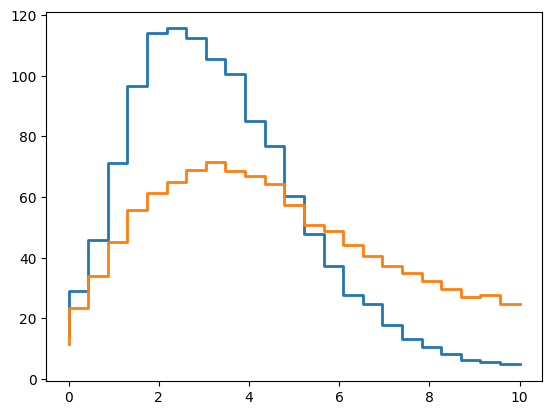

In [9]:
plt.step(np.linspace(0, 10, len(uBFC)), uBFC, ls='-', lw=2)
plt.step(np.linspace(0, 10, len(uBPC)), uBPC, ls='-', lw=2)

In [10]:
from MicroTools.InclusiveTools.inclusive_osc_tools import (
    Decay_muB_OscChi2, DecayMuBNuMuDis, DecayMuBNuEDis
)

In [11]:
theta0 = {"g": 1, "m4": np.sqrt(0.3), "Ue4Sq": 1e-12, "Um4Sq": 1e-12}
theta1 = {"g": 1, "m4": np.sqrt(0.3), "Ue4Sq": 0.8, "Um4Sq": 1e-12}

x1, x2 = DecayMuBNuEDis(theta0, oscillations=True, decay=True)
y1, y2 = DecayMuBNuMuDis(theta0, oscillations=True, decay=True)

x1B, x2B = DecayMuBNuEDis(theta1, oscillations=True, decay=False)
y1B, y2B = DecayMuBNuMuDis(theta1, oscillations=True, decay=False)

[77.71578947352592, 143.9034055725448, 196.07832817316086, 267.1356037149461, 327.16160990690344, 373.3736842103256, 894.8247678014924, 2112.4383900923335, 2272.640247677663, 5099.229102166755, 3630.3808049534077, 2404.0216718265647, 1456.9226006191702]
[77.71578947352592, 143.9034055725448, 196.07832817316086, 267.1356037149461, 327.16160990690344, 373.3736842103256, 894.8247678014924, 2112.4383900923335, 2272.640247677663, 5099.229102166755, 3630.3808049534077, 2404.0216718265647, 1456.9226006191702]
[52.38762745274103, 110.20494403754677, 161.87372454335113, 231.26637114537039, 292.4024404529408, 341.25649669124897, 836.4208782498172, 2025.1325937546221, 2215.7616691411495, 5030.754428705421, 3605.912346984301, 2394.2856038791174, 1452.9861477492705]
[52.38762745274103, 110.20494403754677, 161.87372454335113, 231.26637114537039, 292.4024404529408, 341.25649669124897, 836.4208782498172, 2025.1325937546221, 2215.7616691411495, 5030.754428705421, 3605.912346984301, 2394.2856038791174, 

/Users/kjkelly/Library/CloudStorage/Dropbox/GitHub/muB_oscillation/param_scan.py:190: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, Emin, Emax)[0] / (Emax - Emin)


In [20]:
a0 = np.load("./MicroTools/muB_data/inclusive_data/MuB_NuE_True.npy")

In [26]:
b0 = inclusive_osc_tools.GBFC_NuE.miniToMicro(a0)

In [29]:
b0

array([0.02424025, 0.14396851, 0.36663132, 0.68554265, 1.00892001,
       1.22491717, 1.31749801, 1.37159564, 1.35926782, 1.35791218,
       1.22015418, 1.16568526, 1.03760626, 0.95273291, 0.84517893,
       0.72939688, 0.70906808, 0.58816929, 0.49647129, 0.4294293 ,
       0.37915661, 0.31231495, 0.2809592 , 0.23828669])

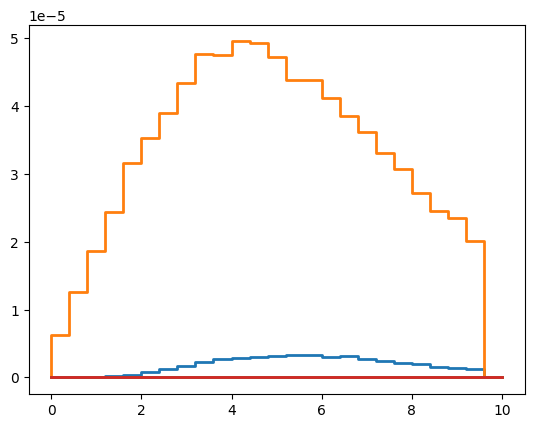

In [18]:
plt.step(np.linspace(0, 10, len(x1)), x1, ls='-', lw=2)
plt.step(np.linspace(0, 10, len(x1)), x2, ls='-', lw=2)

plt.step(np.linspace(0, 10, len(x1)), x1B, ls='-', lw=2)
plt.step(np.linspace(0, 10, len(x1)), x2B, ls='-', lw=2)

#plt.step(np.linspace(0, 10, len(x1)), y1, ls='-', lw=2)
#plt.step(np.linspace(0, 10, len(x1)), y2, ls='-', lw=2)

In [13]:
from MicroTools.InclusiveTools import inclusive_osc_tools

In [14]:
len(inclusive_osc_tools.SigSets[0])

26

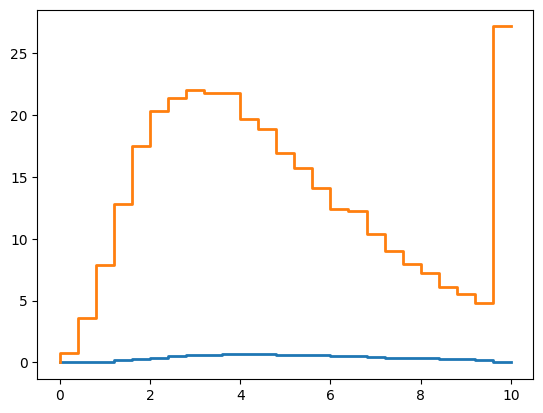

In [15]:
plt.step(np.linspace(0, 10, len(x1)), x1, ls='-', lw=2)
#plt.step(np.linspace(0, 10, len(x1)), x2, ls='-', lw=2)

plt.step(np.linspace(0, 10, len(x1)), inclusive_osc_tools.SigSets[0], ls='-', lw=2)
#plt.step(np.linspace(0, 10, len(x1)), inclusive_osc_tools.SigSets[1], ls='-', lw=2)


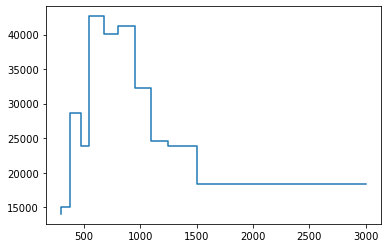

In [35]:
plt.step(nue_bin_edges[1:], Ree_reco, ls='-')

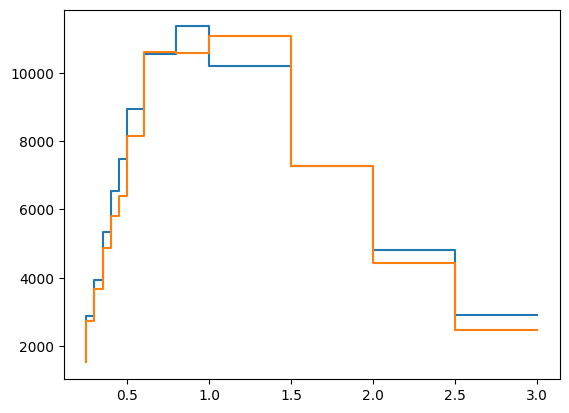

In [7]:
# NuE spectra w/ and w/o energy degradation
PeeRW_old = []
for k in range(len(MCT)):
    RWFact = sterile.PeeAvg(MuB_True_BinEdges[k], MuB_True_BinEdges[k + 1], L)
    PeeRW_old.append(MCT[k] * RWFact / (MuB_True_BinEdges[k + 1] - MuB_True_BinEdges[k]))
plt.step(MuB_True_BinEdges[1:], PeeRW_old)
plt.step(MuB_True_BinEdges[1:], PeeRW)

## Run some scans

In [8]:
def create_grid_of_params(g, m4, Ue4Sq, Um4Sq):
    paramlist_decay = np.array(np.meshgrid(g, m4, Ue4Sq, Um4Sq)).T.reshape(-1, 4)
    return [{"g": g, "m4": m4, "Ue4Sq": Ue4Sq, "Um4Sq": Um4Sq} for g, m4, Ue4Sq, Um4Sq in paramlist_decay]

### 2D scans

De Gouvea's case

In [10]:
# --------------------------------------------------------------------------------
#                 Setting up Parameter Scan -- 2-dimensions
# --------------------------------------------------------------------------------
path_results = "fit_data/"
Npoints = 10

# Range of |U_{\mu4}|^2 scanned over 1e-4 to 1 in 30 steps
x_Vec = np.geomspace(1e-4, 0.9, Npoints)

# Range of gm4 for sterile decay model scanned over 0.1 to 100 in 30 steps
y_Vec = np.geomspace(1e-1, 1e2, Npoints)

# Cartesian product of grid
paramlist_decay = create_grid_of_params(g=1, m4=y_Vec, Ue4Sq=1e-1, Um4Sq=x_Vec)

func_2Dscan_deGouvea = partial(param_scan.DecayReturnMicroBooNEChi2, oscillations=False, decay=True, decouple_decay=True)

# Designed to run in parallel. Set the argument of "Pool" to 1 to disable this.
pool = Pool()
res = pool.map(func_2Dscan_deGouvea, paramlist_decay)
np.save(f"{path_results}/App_gm4_Um4sq_deGouvea", res)

Pure oscillation case

In [9]:
# --------------------------------------------------------------------------------
#                 Setting up Parameter Scan -- 2-dimensions
# --------------------------------------------------------------------------------
path_results = "fit_data/"
Npoints = 15

# Range of |U_{\mu4}|^2 scanned over 1e-4 to 1 in 30 steps
x_Vec = np.geomspace(1e-4, 0.9, Npoints)

# Range of m4 for sterile decay model scanned over 0.1 to 100 in 30 steps
y_Vec = np.geomspace(1e-1, 1e2, Npoints)

# Cartesian product of grid
paramlist_decay = create_grid_of_params(g=0.01, m4=y_Vec, Ue4Sq=5e-2, Um4Sq=x_Vec)

# Pure oscillation method
func_2Dscan_osc = partial(param_scan.DecayReturnMicroBooNEChi2, oscillations=True, decay=True)

# Designed to run in parallel. Set the argument of "Pool" to 1 to disable this.
pool = Pool()
res = pool.map(func_2Dscan_osc, paramlist_decay)
np.save(f"{path_results}/App_gm4_Um4sq_osc_decay_deg_g=0.01_Ue4Sq=0.05", res)

/Users/kjkelly/Library/CloudStorage/Dropbox/GitHub/muB_oscillation/param_scan.py:190: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, Emin, Emax)[0] / (Emax - Emin)
/Users/kjkelly/Library/CloudStorage/Dropbox/GitHub/muB_oscillation/param_scan.py:190: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one wil

In [10]:
# --------------------------------------------------------------------------------
#                 Setting up Parameter Scan -- 3-dimensions
# --------------------------------------------------------------------------------
path_results = "fit_data/"
Npoints = 3

# Range of gm4 for sterile decay model scanned over 0.1 to 1000
gm_Vec = np.geomspace(1e-1, 1e2, Npoints)

# Range of |U_{e4}|^2 scanned over 1e-4 to 1
e_Vec = np.geomspace(1e-4, 0.49, Npoints)

# Range of |U_{\mu4}|^2 scanned over 1e-4 to 1
mu_Vec = np.geomspace(1e-4, 0.49, Npoints)

# Cartesian product of grid
paramlist_decay = create_grid_of_params(g=1, m4=gm_Vec, Ue4Sq=e_Vec, Um4Sq=mu_Vec)

# Pure oscillation method
func_3Dscan_decay = partial(param_scan.DecayReturnMicroBooNEChi2, oscillations=True, decay=True)

# Designed to run in parallel. Set the argument of "Pool" to 1 to disable this.
pool = Pool()
res = pool.map(func_3Dscan_decay, paramlist_decay)
np.save(f"{path_results}/App_gm4_Ue4sq_Um4sq_test", res)

/Users/kjkelly/Library/CloudStorage/Dropbox/GitHub/muB_oscillation/param_scan.py:190: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, Emin, Emax)[0] / (Emax - Emin)
/Users/kjkelly/Library/CloudStorage/Dropbox/GitHub/muB_oscillation/param_scan.py:190: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one wil

In [11]:
# --------------------------------------------------------------------------------
#                 Setting up Parameter Scan -- 4-dimensions
# --------------------------------------------------------------------------------
path_results = "fit_data/"
Npoints = 15

# Range of gm4 for sterile decay model scanned over 0.1 to 1000
g_Vec = np.geomspace(1e-1, 1e2, Npoints)

# Range of m4 for sterile decay model scanned over 10 to 1000 eV
m_Vec = np.geomspace(1e1, 1e3, Npoints)

# Range of |U_{e4}|^2 scanned over 1e-4 to 1
e_Vec = np.geomspace(1e-4, 0.49, Npoints)

# Range of |U_{\mu4}|^2 scanned over 1e-4 to 1
mu_Vec = np.geomspace(1e-4, 0.49, Npoints)

# Cartesian product of grid
paramlist_decay = create_grid_of_params(g=g_Vec, m4=m_Vec, Ue4Sq=e_Vec, Um4Sq=mu_Vec)

# Pure oscillation method
func_3Dscan_decay = partial(param_scan.DecayReturnMicroBooNEChi2, oscillations=True, decay=True)

# Designed to run in parallel. Set the argument of "Pool" to 1 to disable this.
pool = Pool()
res = pool.map(func_3Dscan_decay, paramlist_decay)
np.save(f"{path_results}/App_g_m4_Ue4sq_Um4sq_v1", res)

/Users/kjkelly/Library/CloudStorage/Dropbox/GitHub/muB_oscillation/param_scan.py:190: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, Emin, Emax)[0] / (Emax - Emin)
/Users/kjkelly/Library/CloudStorage/Dropbox/GitHub/muB_oscillation/param_scan.py:190: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one wil

KeyboardInterrupt: 

### Deprecated

THis code needs to adapted to the method above.

In [73]:
# --------------------------------------------------------------------------------
#                 Setting up Parameter Scan -- 3-dimensions
# --------------------------------------------------------------------------------
path_results = "fit_data/"
Npoints = 15

# Range of gm4 for sterile decay model scanned over 0.1 to 100
gm_Vec = np.geomspace(1e-1, 1e3, Npoints)

# Range of |U_{e4}|^2 scanned over 1e-4 to 1
e_Vec = np.geomspace(1e-4, 0.49, Npoints)

# Range of |U_{\mu4}|^2 scanned over 1e-4 to 1
mu_Vec = np.geomspace(1e-4, 0.49, Npoints)

# Cartesian product of grid
paramlist_decay = np.array(np.meshgrid(gm_Vec, e_Vec, mu_Vec)).T.reshape(-1, 3)
print(paramlist_decay)

# Designed to run in parallel. Set the argument of "Pool" to 1 to disable this.
pool = Pool()
res = pool.map(param_scan.DecayReturnMicroBooNEChi2_3D, paramlist_decay)
np.save(f"{path_results}/App_gm4_Ue4sq_Um4sq_migrated_v3_15*15*15", res)

[[1.00000000e-01 1.00000000e-04 1.00000000e-04]
 [1.00000000e-01 1.83478607e-04 1.00000000e-04]
 [1.00000000e-01 3.36643992e-04 1.00000000e-04]
 ...
 [1.00000000e+05 1.45554357e-01 4.90000000e-01]
 [1.00000000e+05 2.67061108e-01 4.90000000e-01]
 [1.00000000e+05 4.90000000e-01 4.90000000e-01]]


In [72]:
# ---------------------------------------------------------------------------------------------
#                 Setting up Parameter Scan -- 3-dimensions with 1 parameter fixed
# ---------------------------------------------------------------------------------------------
path_results = "fit_data/"
Npoints = 15

# Range of |U_{\mu4}|^2 scanned over 1e-4 to 1 in 30 steps
mu_Vec = np.geomspace(1e-4, 0.49, Npoints)

# Range of gm4 for sterile decay model scanned over 0.1 to 100 in 30 steps
gm_Vec = np.geomspace(1e-1, 1e2, Npoints)

# Cartesian product of grid
paramlist_decay = np.array(np.meshgrid(gm_Vec, 1e-1, mu_Vec)).T.reshape(-1, 3)
print(paramlist_decay)

# Designed to run in parallel. Set the argument of "Pool" to 1 to disable this.
pool = Pool()
res = pool.map(param_scan.DecayReturnMicroBooNEChi2_3D, paramlist_decay)
np.save(f"{path_results}/Fixed_Ue4sq_1e-2_15*15_v3", res)

[[1.00000000e-01 1.00000000e-01 1.00000000e-04]
 [1.63789371e-01 1.00000000e-01 1.00000000e-04]
 [2.68269580e-01 1.00000000e-01 1.00000000e-04]
 [4.39397056e-01 1.00000000e-01 1.00000000e-04]
 [7.19685673e-01 1.00000000e-01 1.00000000e-04]
 [1.17876863e+00 1.00000000e-01 1.00000000e-04]
 [1.93069773e+00 1.00000000e-01 1.00000000e-04]
 [3.16227766e+00 1.00000000e-01 1.00000000e-04]
 [5.17947468e+00 1.00000000e-01 1.00000000e-04]
 [8.48342898e+00 1.00000000e-01 1.00000000e-04]
 [1.38949549e+01 1.00000000e-01 1.00000000e-04]
 [2.27584593e+01 1.00000000e-01 1.00000000e-04]
 [3.72759372e+01 1.00000000e-01 1.00000000e-04]
 [6.10540230e+01 1.00000000e-01 1.00000000e-04]
 [1.00000000e+02 1.00000000e-01 1.00000000e-04]
 [1.00000000e-01 1.00000000e-01 1.83478607e-04]
 [1.63789371e-01 1.00000000e-01 1.83478607e-04]
 [2.68269580e-01 1.00000000e-01 1.83478607e-04]
 [4.39397056e-01 1.00000000e-01 1.83478607e-04]
 [7.19685673e-01 1.00000000e-01 1.83478607e-04]
 [1.17876863e+00 1.00000000e-01 1.834786

In [69]:
# ---------------------------------------------------------------------------------------------
#                 Setting up Parameter Scan -- 4-dimensions with 1 parameter fixed
# ---------------------------------------------------------------------------------------------
path_results = "fit_data/"
Npoints = 15

m4 = 1e3

# Range of |U_{\mu4}|^2 scanned over 1e-4 to 0.5 in 15 steps
mu_Vec = np.geomspace(1e-4, 0.49, Npoints)

# Range of g for sterile decay model scanned over 0.1 to 100 in 15 steps
g_Vec = np.geomspace(1e-1, 1e2, Npoints)

# Range of |U_{e4}|^2 scanned over 1e-4 to 0.5 in 15 steps
e_Vec = np.geomspace(1e-4, 0.49, Npoints)

# Cartesian product of grid
paramlist_decay = np.array(np.meshgrid(g_Vec, m4, e_Vec, mu_Vec)).T.reshape(-1, 4)
print(paramlist_decay)

# Designed to run in parallel. Set the argument of "Pool" to 1 to disable this.
pool = Pool()
res = pool.map(param_scan.DecayReturnMicroBooNEChi2_4D, paramlist_decay)
np.save(f"{path_results}/Fixed_m4_1e3_15*15*15_v1", res)

[[1.00000000e-01 1.00000000e+03 1.00000000e-04 1.00000000e-04]
 [1.63789371e-01 1.00000000e+03 1.00000000e-04 1.00000000e-04]
 [2.68269580e-01 1.00000000e+03 1.00000000e-04 1.00000000e-04]
 ...
 [3.72759372e+01 1.00000000e+03 4.90000000e-01 4.90000000e-01]
 [6.10540230e+01 1.00000000e+03 4.90000000e-01 4.90000000e-01]
 [1.00000000e+02 1.00000000e+03 4.90000000e-01 4.90000000e-01]]
